In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [2]:
train = pd.read_csv("eng_3_train.tsv", delimiter="\t").fillna(" ")
train.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Non-anti-LGBT+ content,"I support her, very smart ponnu",,,,,,,,,,,,,,,,
1,Homophobic,priyadharshini kannan same gender attraction ...,,,,,,,,,,,,,,,,
2,Non-anti-LGBT+ content,Bro u name and phone number (or)mobile number ...,,,,,,,,,,,,,,,,
3,Non-anti-LGBT+ content,experience Thaks bro I love you so much bro ...,,,,,,,,,,,,,,,,
4,Non-anti-LGBT+ content,world is becoming bad day by day....,,,,,,,,,,,,,,,,


<IPython.core.display.Javascript object>

In [3]:
train.drop(train.iloc[:, 2:18], inplace=True, axis=1)
train.head(5)

,category,text
0,Non-anti-LGBT+ content,"I support her, very smart ponnu"
1,Homophobic,priyadharshini kannan same gender attraction ...
2,Non-anti-LGBT+ content,Bro u name and phone number (or)mobile number ...
3,Non-anti-LGBT+ content,experience Thaks bro I love you so much bro ...
4,Non-anti-LGBT+ content,world is becoming bad day by day....


<IPython.core.display.Javascript object>

In [4]:
train.rename(columns={"category": "Label", train.columns[1]: "Text"}, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
train.head(5)

,Label,Text
0,Non-anti-LGBT+ content,"I support her, very smart ponnu"
1,Homophobic,priyadharshini kannan same gender attraction ...
2,Non-anti-LGBT+ content,Bro u name and phone number (or)mobile number ...
3,Non-anti-LGBT+ content,experience Thaks bro I love you so much bro ...
4,Non-anti-LGBT+ content,world is becoming bad day by day....


<IPython.core.display.Javascript object>

In [6]:
train.shape

(3164, 2)

<IPython.core.display.Javascript object>

In [7]:
test = (
    pd.read_csv("eng_3_test.tsv", delimiter="\t").fillna(" ").drop(["category"], axis=1)
)
test.head()

,text
0,Spr....2016 poitan feel happy with my partner ...
1,R u still with ur partner
2,excellent movie..no unnecessary drama or scene...
3,"For those who speak about culture., pre marita..."
4,Best movie and people not understand relations...


<IPython.core.display.Javascript object>

In [8]:
test.rename(columns={test.columns[0]: "Text"}, inplace=True)
test.head(5)

,Text
0,Spr....2016 poitan feel happy with my partner ...
1,R u still with ur partner
2,excellent movie..no unnecessary drama or scene...
3,"For those who speak about culture., pre marita..."
4,Best movie and people not understand relations...


<IPython.core.display.Javascript object>

In [9]:
test.shape

(999, 1)

<IPython.core.display.Javascript object>

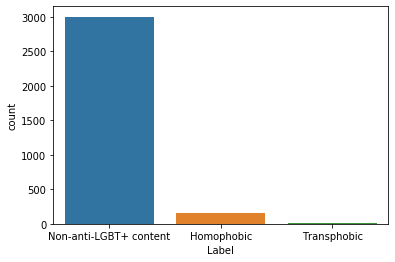

<IPython.core.display.Javascript object>

In [10]:
sns.countplot(train.Label)

In [11]:
def label_encoder(train):
    train.replace(to_replace="Non-anti-LGBT+ content", value=0, inplace=True)
    train.replace(to_replace="Homophobic", value=1, inplace=True)
    train.replace(to_replace="Transphobic", value=2, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
label_encoder(train["Label"])

<IPython.core.display.Javascript object>

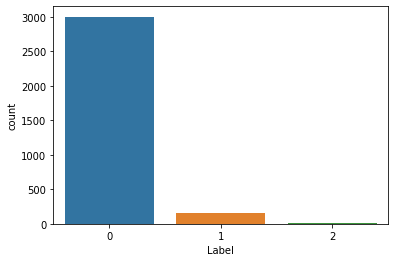

<IPython.core.display.Javascript object>

In [13]:
sns.countplot(train.Label)

## Data Preprocessing

In [14]:
train.Label.value_counts()

0    3001
1     157
2       6
Name: Label, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# word count comparison
# Non anti and Homophobic
def plot_target_based_features(feature):
    x1 = train[train.Label == 1][feature]
    x2 = train[train.Label == 0][feature]
    x3 = train[train.Label == 2][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)  # non anti lgbt
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)  # homophobic
    return _

<IPython.core.display.Javascript object>

In [16]:
train["words_count"] = train.Text.str.split().map(lambda x: len(x))

<IPython.core.display.Javascript object>

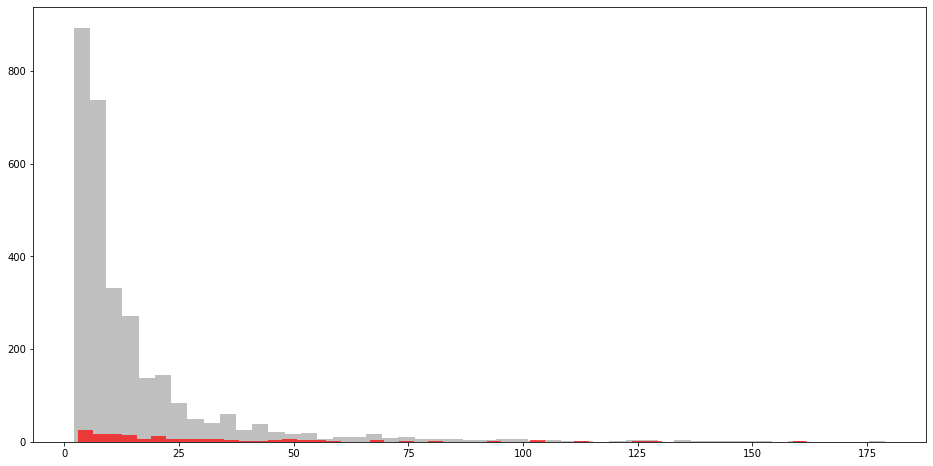

<IPython.core.display.Javascript object>

In [17]:
_ = plot_target_based_features("words_count")

In [18]:
# Non anti and transphobic
def plot_target_based_features1(feature):
    x1 = train[train.Label == 1][feature]
    x2 = train[train.Label == 0][feature]
    x3 = train[train.Label == 2][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)  # non anti lgbt
    _ = plt.hist(x3, alpha=0.7, color="red", bins=50)  # transphobic
    return _

<IPython.core.display.Javascript object>

In [19]:
train["words_count1"] = train.Text.str.split().map(lambda x: len(x))

<IPython.core.display.Javascript object>

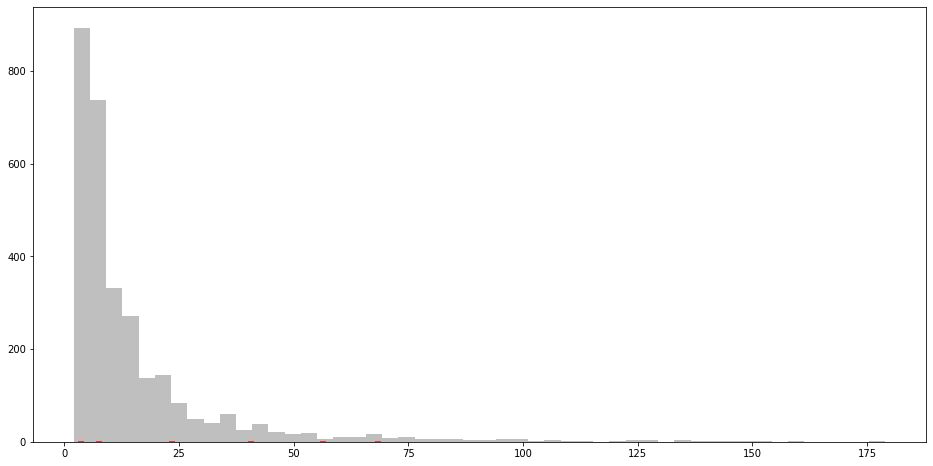

<IPython.core.display.Javascript object>

In [20]:
_ = plot_target_based_features1("words_count1")

In [21]:
# homophobic and trasphobic
def plot_target_based_features2(feature):
    x1 = train[train.Label == 1][feature]
    x2 = train[train.Label == 0][feature]
    x3 = train[train.Label == 2][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x1, alpha=0.5, color="grey", bins=50)  # homophobic
    _ = plt.hist(x3, alpha=0.7, color="red", bins=50)  # transphobic
    return _

<IPython.core.display.Javascript object>

In [22]:
train["words_count2"] = train.Text.str.split().map(lambda x: len(x))

<IPython.core.display.Javascript object>

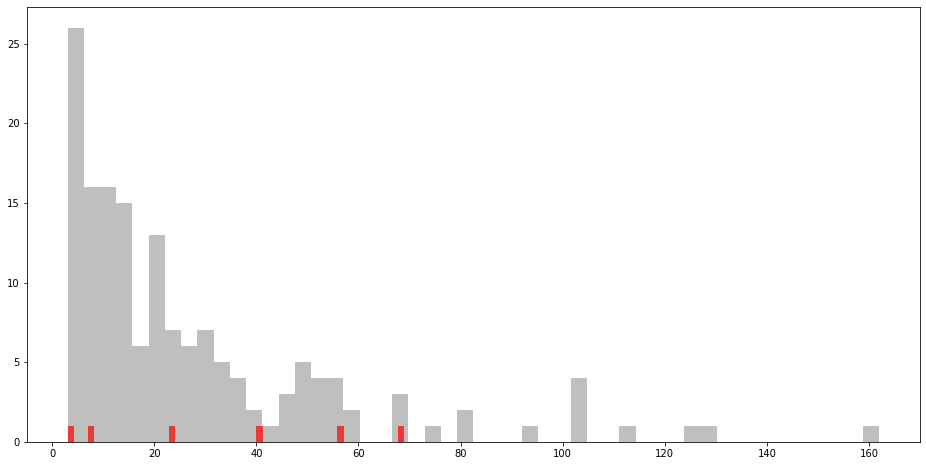

<IPython.core.display.Javascript object>

In [23]:
_ = plot_target_based_features2("words_count2")

In [24]:
# unique word count
train["unique_word_count"] = train.Text.map(lambda x: len(set(str(x).split())))

<IPython.core.display.Javascript object>

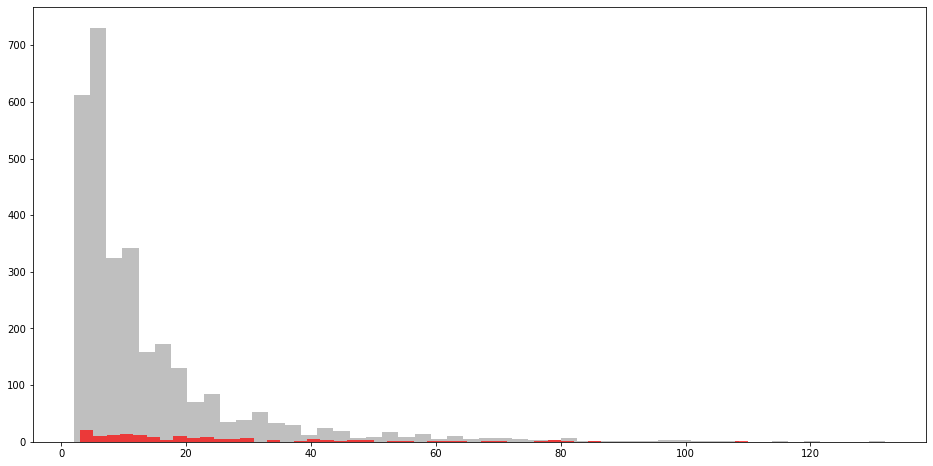

<IPython.core.display.Javascript object>

In [25]:
# non anti lgbt and homophobic
_ = plot_target_based_features("unique_word_count")

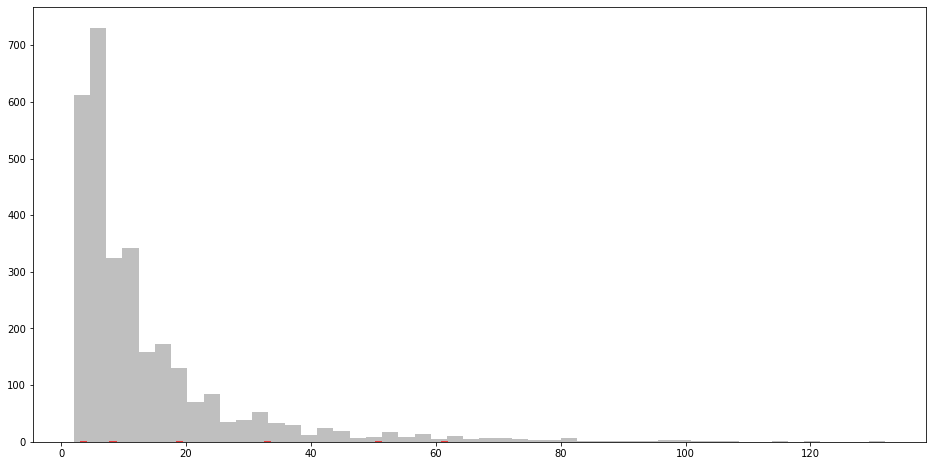

<IPython.core.display.Javascript object>

In [26]:
# non anti lgbt and transphobic
_ = plot_target_based_features1("unique_word_count")

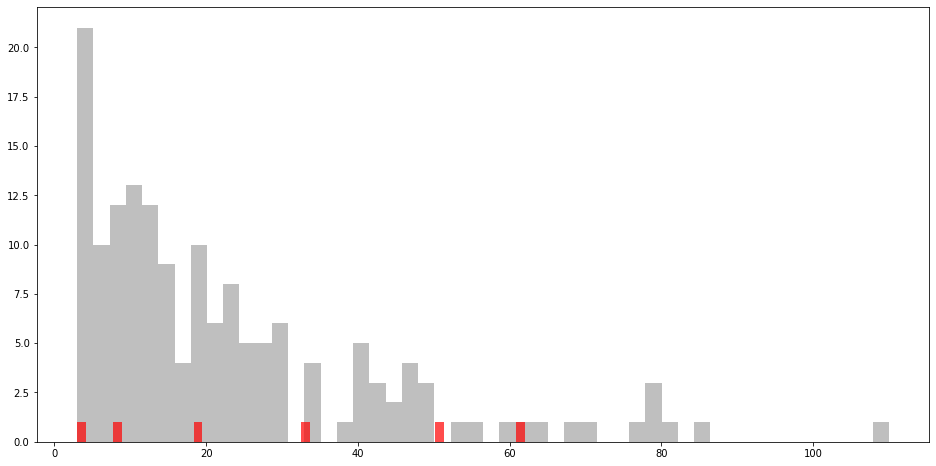

<IPython.core.display.Javascript object>

In [27]:
# homophobic and transphobic
_ = plot_target_based_features2("unique_word_count")

In [28]:
def create_corpus(df, Label):
    """
    Create corpus based on the target.
    """
    corpus = []

    for x in df[df["Label"] == Label].Text.str.split():
        for i in x:
            corpus.append(i)
    return corpus

<IPython.core.display.Javascript object>

In [29]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

<IPython.core.display.Javascript object>

In [30]:
from collections import defaultdict

<IPython.core.display.Javascript object>

In [31]:
corpus0 = create_corpus(df=train, Label=0)
corpus1 = create_corpus(df=train, Label=1)
corpus2 = create_corpus(df=train, Label=2)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] += 1

d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] += 1

d2 = defaultdict(int)
for word in corpus2:
    if word in stop:
        d2[word] += 1

<IPython.core.display.Javascript object>

In [32]:
top0 = sorted(d0.items(), key=lambda x: x[1], reverse=True)[:10]
top1 = sorted(d1.items(), key=lambda x: x[1], reverse=True)[:10]
top2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:10]

<IPython.core.display.Javascript object>

In [33]:
x0, y0 = zip(*top0)
x1, y1 = zip(*top1)
x2, y2 = zip(*top2)

<IPython.core.display.Javascript object>

<BarContainer object of 10 artists>

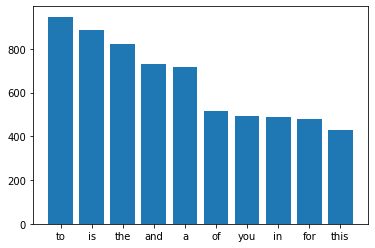

<IPython.core.display.Javascript object>

In [34]:
plt.bar(x0, y0)

<BarContainer object of 10 artists>

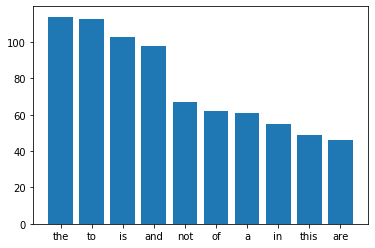

<IPython.core.display.Javascript object>

In [35]:
plt.bar(x1, y1)

<BarContainer object of 10 artists>

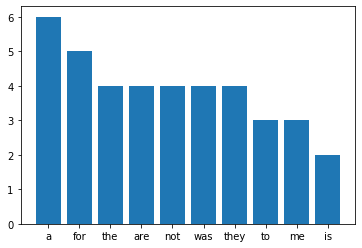

<IPython.core.display.Javascript object>

In [36]:
plt.bar(x2, y2)

In [37]:
import string

<IPython.core.display.Javascript object>

In [38]:
# removing url and html
def remove_URL(Text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", Text)


def remove_html(Text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", Text)

<IPython.core.display.Javascript object>

In [39]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

<IPython.core.display.Javascript object>

In [40]:
# remove punctuations
def remove_punct(Text):
    table = str.maketrans("", "", string.punctuation)
    return Text.translate(table)

<IPython.core.display.Javascript object>

In [41]:
train["Text"] = train.Text.map(lambda x: remove_URL(x))
train["Text"] = train.Text.map(lambda x: remove_html(x))
train["Text"] = train.Text.map(lambda x: remove_emoji(x))
train["Text"] = train.Text.map(lambda x: remove_punct(x))

<IPython.core.display.Javascript object>

In [42]:
# removing stopwords
def remove_stopwords(Text):
    Text = [word.lower() for word in Text.split() if word.lower() not in stop]

    return " ".join(Text)

<IPython.core.display.Javascript object>

In [43]:
train["Text"] = train["Text"].map(remove_stopwords)

<IPython.core.display.Javascript object>

In [44]:
# plotting word cloud
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

In [45]:
corpus0 = create_corpus(df=train, Label=0)
corpus1 = create_corpus(df=train, Label=1)
corpus2 = create_corpus(df=train, Label=2)

<IPython.core.display.Javascript object>

In [46]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)
word_cloud2 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus2[:50])
)

<IPython.core.display.Javascript object>

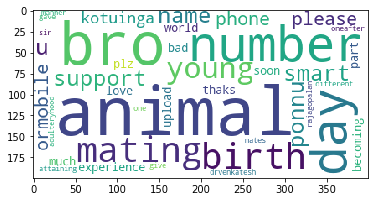

<IPython.core.display.Javascript object>

In [47]:
plt.imshow(word_cloud0)

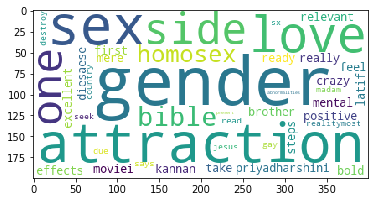

<IPython.core.display.Javascript object>

In [48]:
plt.imshow(word_cloud1)

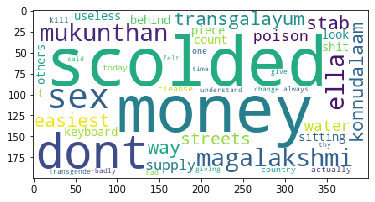

<IPython.core.display.Javascript object>

In [49]:
plt.imshow(word_cloud2)

In [50]:
# Stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

<IPython.core.display.Javascript object>

In [51]:
def stemming(Text):
    Text = [stemmer.stem(word) for word in Text.split()]

    return " ".join(Text)

<IPython.core.display.Javascript object>

In [52]:
train["Text"] = train["Text"].map(stemming)

<IPython.core.display.Javascript object>

In [53]:
corpus0 = create_corpus(df=train, Label=0)
corpus1 = create_corpus(df=train, Label=1)
corpus2 = create_corpus(df=train, Label=2)

<IPython.core.display.Javascript object>

In [54]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:50])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:50])
)
word_cloud2 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus2[:50])
)

<IPython.core.display.Javascript object>

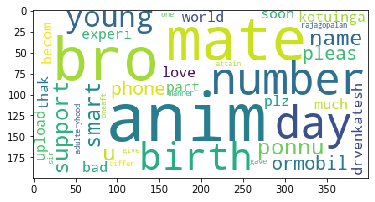

<IPython.core.display.Javascript object>

In [55]:
plt.imshow(word_cloud0)

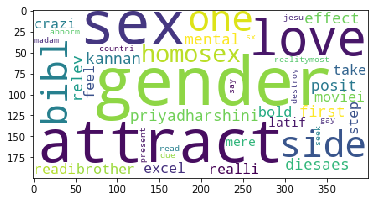

<IPython.core.display.Javascript object>

In [56]:
plt.imshow(word_cloud1)

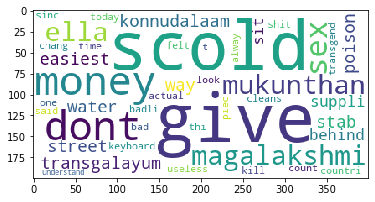

<IPython.core.display.Javascript object>

In [57]:
plt.imshow(word_cloud2)

In [58]:
# Tokenization
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

train["tokens"] = train["Text"].map(tokenizer.tokenize)

<IPython.core.display.Javascript object>

In [59]:
train[["Text", "tokens"]].head(10)

,Text,tokens
0,support smart ponnu,"[support, smart, ponnu]"
1,priyadharshini kannan gender attract sex love ...,"[priyadharshini, kannan, gender, attract, sex,..."
2,bro u name phone number ormobil number pleas k...,"[bro, u, name, phone, number, ormobil, number,..."
3,experi thak bro love much bro,"[experi, thak, bro, love, much, bro]"
4,world becom bad day day,"[world, becom, bad, day, day]"
5,plz upload part 2 soon,"[plz, upload, part, 2, soon]"
6,drvenkatesh rajagopalan sir mate anim differ m...,"[drvenkatesh, rajagopalan, sir, mate, anim, di..."
7,support lgbt support man man mirrag equal,"[support, lgbt, support, man, man, mirrag, equal]"
8,person educ train job secur person nursinghom ...,"[person, educ, train, job, secur, person, nurs..."
9,total move movi superb pictur music emot seque...,"[total, move, movi, superb, pictur, music, emo..."


<IPython.core.display.Javascript object>

### Bag of Words


In [60]:
from sklearn.feature_extraction.text import CountVectorizer


def count_vect(data, ngrams=(1, 1)):
    count_vectorizer = CountVectorizer(ngram_range=ngrams)
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

<IPython.core.display.Javascript object>

In [61]:
train_counts, count_vectorizer = count_vect(train["Text"])
test_counts = count_vectorizer.transform(test["Text"])

<IPython.core.display.Javascript object>

## Classification

### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [63]:
X = train_counts
y = train["Label"].values

X_train_counts, X_test, y_train_counts, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

<IPython.core.display.Javascript object>

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train_counts, y_train_counts)

KNeighborsClassifier(p=1)

<IPython.core.display.Javascript object>

In [65]:
y_pred = knn.predict(X_test)

accscore = accuracy_score(y_test, y_pred)
accscore

0.9541864139020537

<IPython.core.display.Javascript object>

### SVM

In [66]:
from sklearn.svm import SVC

<IPython.core.display.Javascript object>

In [67]:
svm1 = SVC(kernel="rbf")
svm1.fit(X_train_counts, y_train_counts)

SVC()

<IPython.core.display.Javascript object>

In [68]:
y_predSVM1 = svm1.predict(X_test)

<IPython.core.display.Javascript object>

In [69]:
svm_rbfAccuracy = accuracy_score(y_test, y_predSVM1)
svm_rbfAccuracy

0.9541864139020537

<IPython.core.display.Javascript object>